# Dataset from

https://data.ct.gov/Housing-and-Development/Real-Estate-Sales-2001-2022-GL/5mzw-sjtu/about_data


## Import necessary libraries

## import only 100k records from dataset


In [31]:
# load 100,000 records from csv file with pandas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data
data = pd.read_csv("Real_Estate_Sales_2001-2022_GL_20240919.csv", nrows=100000)
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.5992,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN


## Select the feature/column we want to learn from and infer from


In [32]:
# all the rows we need are
# 1. List Year
# 2. Date Recorded
# 3. Town
# 4. Assessed Value
# 5. Sale Amount
# 6. Property Type
# 7. Residential Type - treat NaN as "Empty"

data = data[
    [
        "List Year",
        "Date Recorded",
        "Town",
        "Assessed Value",
        "Sale Amount",
        "Property Type",
        "Residential Type",
    ]
]
data.head()

,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Property Type,Residential Type
0,2022,01/30/2023,Andover,139020.0,232000.0,Residential,Single Family
1,2020,09/13/2021,Ansonia,150500.0,325000.0,Commercial,NaN
2,2020,10/02/2020,Ashford,253000.0,430000.0,Residential,Single Family
3,2021,07/05/2022,Avon,329730.0,805000.0,Residential,Single Family
4,2020,03/09/2021,Avon,130400.0,179900.0,Residential,Condo


# Find out a way to categorize Sale and Assessed values


In [33]:
# get max and min of Assessed Value and Sale Amount
print("Assessed max - ", data["Assessed Value"].max())
print("Assessed min - ", data["Assessed Value"].min())
print("Sale max - ", data["Sale Amount"].max())
print("Sale min - ", data["Sale Amount"].min())

Assessed max -  114924210.0
Assessed min -  0.0
Sale max -  5000000000.0
Sale min -  0.0


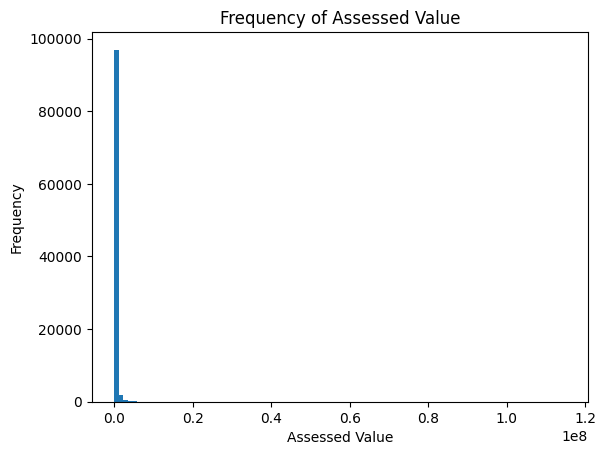

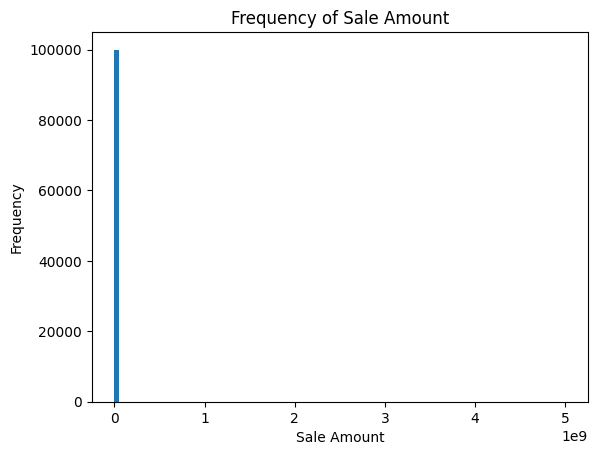

In [34]:
# draw graph of frequency of Assessed Value
plt.hist(data["Assessed Value"], bins=100)
plt.xlabel("Assessed Value")
plt.ylabel("Frequency")
plt.title("Frequency of Assessed Value")
plt.show()

# draw graph of frequency of Sale Amount
plt.hist(data["Sale Amount"], bins=100)
plt.xlabel("Sale Amount")
plt.ylabel("Frequency")
plt.title("Frequency of Sale Amount")
plt.show()

## cut outliers


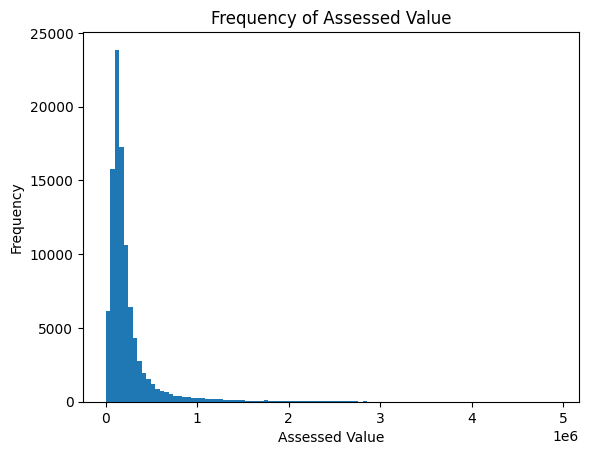

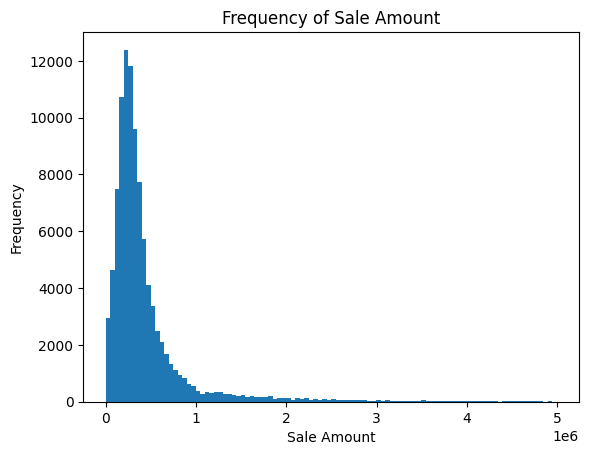

In [35]:
# cut the sale price from 0.05 * 1e8
# cut the assessed value from 0.05 * 1e8
data = data[(data["Sale Amount"] < 0.05 * 1e8) & (data["Assessed Value"] < 0.05 * 1e8)]

# draw graph of frequency of Assessed Value
plt.hist(data["Assessed Value"], bins=100)
plt.xlabel("Assessed Value")
plt.ylabel("Frequency")
plt.title("Frequency of Assessed Value")
plt.show()

# draw graph of frequency of Sale Amount
plt.hist(data["Sale Amount"], bins=100)
plt.xlabel("Sale Amount")
plt.ylabel("Frequency")
plt.title("Frequency of Sale Amount")
plt.show()

## price category found


In [36]:
# CATEGORIZE PRICES AS SUCH
# Upto 100k
# 100k
# 200k
# 500ks
# 1m
# 5m
# 10m+

# split Sale Amount into categories
bins = [0, 100000, 200000, 500000, 1000000, 5000000, 10000000, np.inf]
labels = [
    "Upto 100k",
    "100k",
    "200k",
    "500ks",
    "1m",
    "5m",
    "10m+",
]
data["Sale Amount Category"] = pd.cut(data["Sale Amount"], bins=bins, labels=labels)
data["Assessed Value Category"] = pd.cut(
    data["Assessed Value"], bins=bins, labels=labels
)

data.head()

,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Property Type,Residential Type,Sale Amount Category,Assessed Value Category
0,2022,01/30/2023,Andover,139020.0,232000.0,Residential,Single Family,200k,100k
1,2020,09/13/2021,Ansonia,150500.0,325000.0,Commercial,NaN,200k,100k
2,2020,10/02/2020,Ashford,253000.0,430000.0,Residential,Single Family,200k,200k
3,2021,07/05/2022,Avon,329730.0,805000.0,Residential,Single Family,500ks,200k
4,2020,03/09/2021,Avon,130400.0,179900.0,Residential,Condo,100k,100k


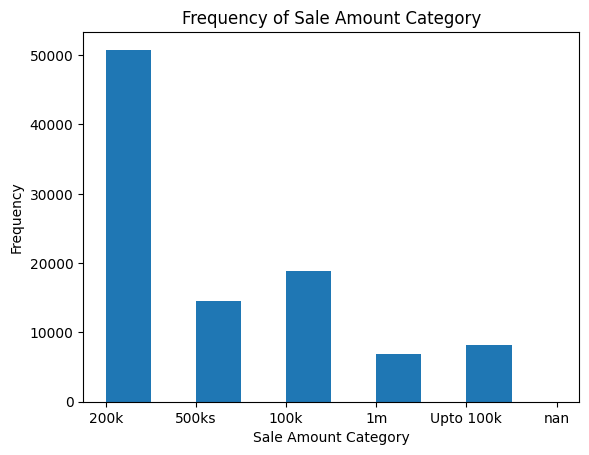

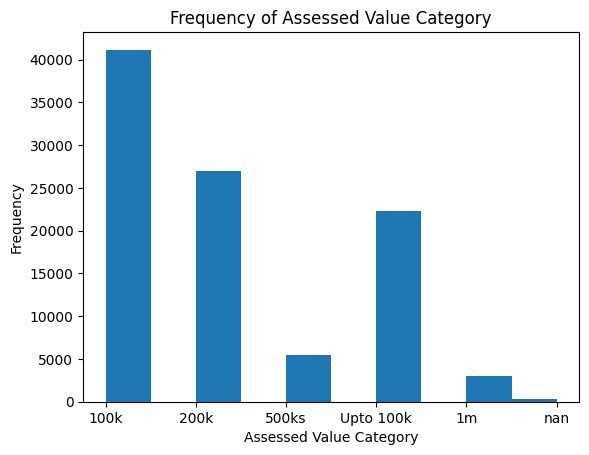

In [37]:
# draw graph of frequency of Sale Amount Category
plt.hist(data["Sale Amount Category"].astype(str))
plt.xlabel("Sale Amount Category")
plt.ylabel("Frequency")
plt.title("Frequency of Sale Amount Category")
plt.show()

# draw graph of frequency of Assessed Value Category
plt.hist(data["Assessed Value Category"].astype(str))
plt.xlabel("Assessed Value Category")
plt.ylabel("Frequency")
plt.title("Frequency of Assessed Value Category")
plt.show()

## 1. remove original columns, and keep the ones we want/constructed

## 2. residential types can be empty so set nans as empty. then drop all other nans


In [38]:
# remove the original columns, and nan values in the new columns
data = data.drop(columns=["Sale Amount", "Assessed Value"])
# set nan values in Residential Type to "Empty"
data["Residential Type"] = data["Residential Type"].fillna("Empty")
data = data.dropna()
data.head()

,List Year,Date Recorded,Town,Property Type,Residential Type,Sale Amount Category,Assessed Value Category
0,2022,01/30/2023,Andover,Residential,Single Family,200k,100k
1,2020,09/13/2021,Ansonia,Commercial,Empty,200k,100k
2,2020,10/02/2020,Ashford,Residential,Single Family,200k,200k
3,2021,07/05/2022,Avon,Residential,Single Family,500ks,200k
4,2020,03/09/2021,Avon,Residential,Condo,100k,100k


# more visualization to understand the data


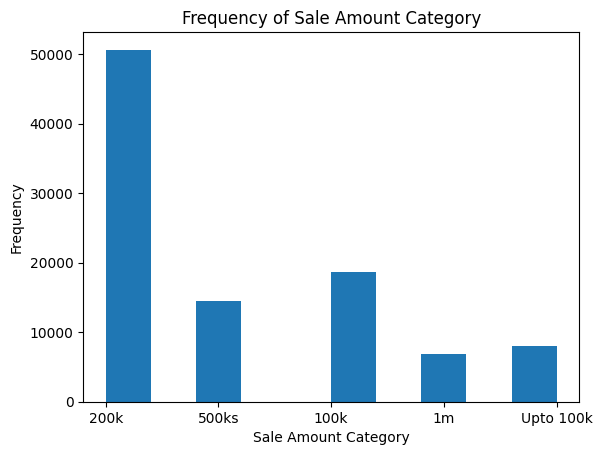

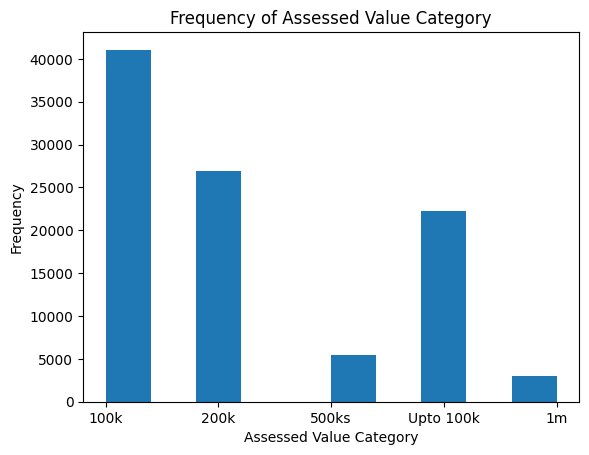

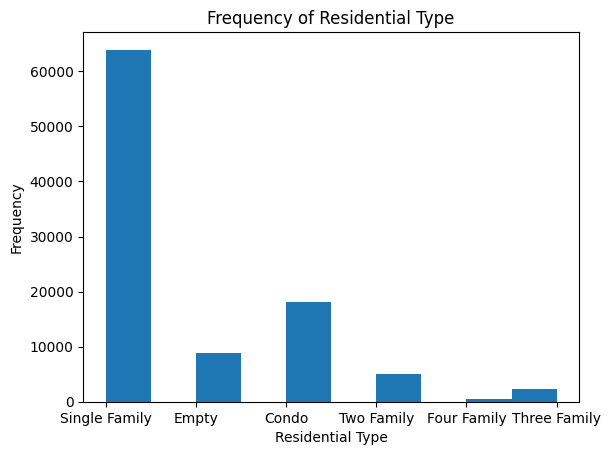

In [40]:
# draw graph of frequency of Sale Amount Category
plt.hist(data["Sale Amount Category"].astype(str))
plt.xlabel("Sale Amount Category")
plt.ylabel("Frequency")
plt.title("Frequency of Sale Amount Category")
plt.show()

# draw graph of frequency of Assessed Value Category
plt.hist(data["Assessed Value Category"].astype(str))
plt.xlabel("Assessed Value Category")
plt.ylabel("Frequency")
plt.title("Frequency of Assessed Value Category")
plt.show()

# draw graph of frequency of Residential Type
plt.hist(data["Residential Type"].astype(str))
plt.xlabel("Residential Type")
plt.ylabel("Frequency")
plt.title("Frequency of Residential Type")
plt.show()

In [41]:
# change date recorded dates to Year
data["Date Recorded"] = pd.to_datetime(data["Date Recorded"])
data["Date Recorded"] = data["Date Recorded"].dt.year

data.head()

,List Year,Date Recorded,Town,Property Type,Residential Type,Sale Amount Category,Assessed Value Category
0,2022,2023,Andover,Residential,Single Family,200k,100k
1,2020,2021,Ansonia,Commercial,Empty,200k,100k
2,2020,2020,Ashford,Residential,Single Family,200k,200k
3,2021,2022,Avon,Residential,Single Family,500ks,200k
4,2020,2021,Avon,Residential,Condo,100k,100k


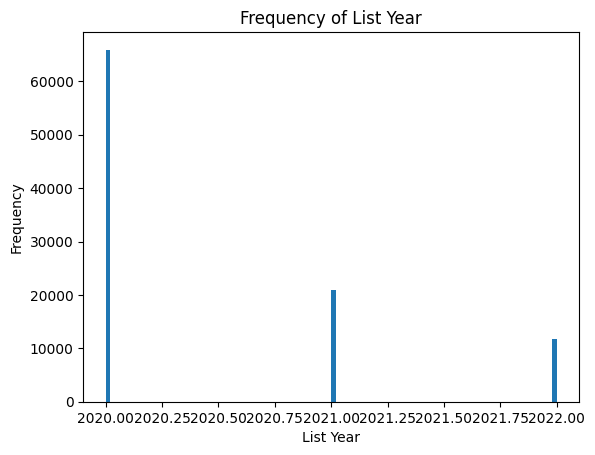

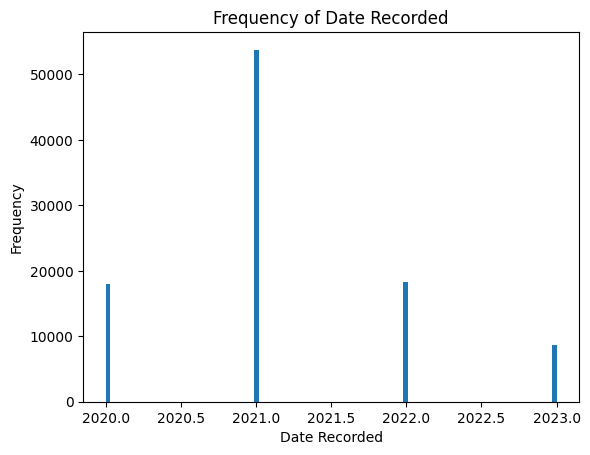

In [42]:
# draw frequency of List Year and Date Recorded
plt.hist(data["List Year"], bins=100)
plt.xlabel("List Year")
plt.ylabel("Frequency")
plt.title("Frequency of List Year")
plt.show()

plt.hist(data["Date Recorded"], bins=100)
plt.xlabel("Date Recorded")
plt.ylabel("Frequency")
plt.title("Frequency of Date Recorded")
plt.show()

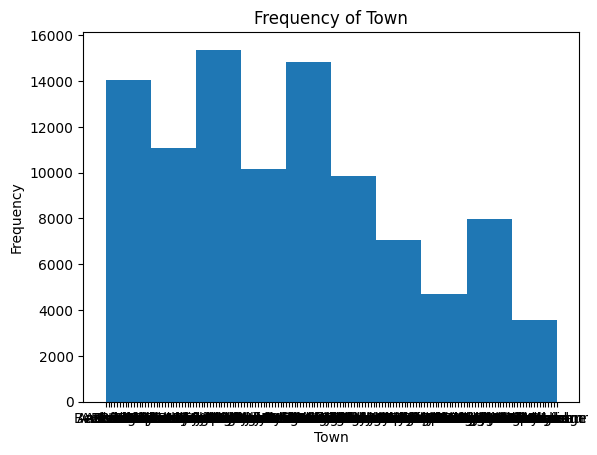

In [43]:
# frequency of Town
plt.hist(data["Town"].astype(str))
plt.xlabel("Town")
plt.ylabel("Frequency")
plt.title("Frequency of Town")
plt.show()

# finally save cleaned data and exit 🚶‍♂️


In [44]:
# save the data to a new csv file
data.to_csv("Real_Estate_Sales_2001-2022_GL_20240919_cleaned.csv", index=False)